In [2]:
#Import everything
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import numpy as np
figsize(12.5, 4)
import pymc as pm

In [3]:
#generating pymc variables. these are full distrobutions
parameter = pm.Exponential("poisson_param", 1)
data_generator = pm.Poisson("data_generator", parameter)
data_plus_one = data_generator + 1

In [4]:
#find child
print("Children of `parameter`: ")
print(parameter.children)

#find parent
print("\nParents of `parameter`: ")
print(parameter.parents)

Children of `parameter`: 
set([<pymc.distributions.Poisson 'data_generator' at 0x0000000004133320>])

Parents of `parameter`: 
{'beta': 1}


In [5]:
#generate a value from the distrobution
print("parameter.value =", parameter.value)
parameter.random()
print("parameter.value =", parameter.value)

('parameter.value =', array(2.0899160075844767))
('parameter.value =', array(0.47940111050494544))


In [6]:
#simulate a range of random values from the distrobution
samples = [parameter.random() for i in range(50000)]

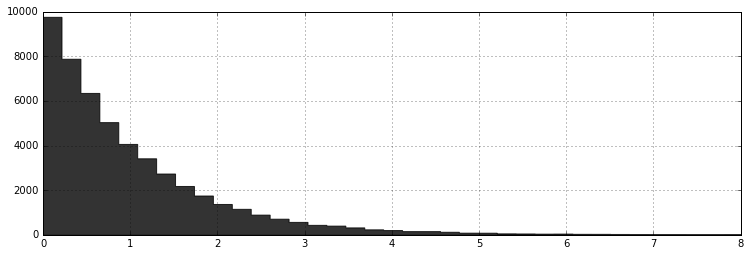

In [7]:
#plot it
plt.hist(samples, bins=50, color="k", alpha = .8, histtype="stepfilled")
plt.xlim(0, 8);
plt.grid(True);

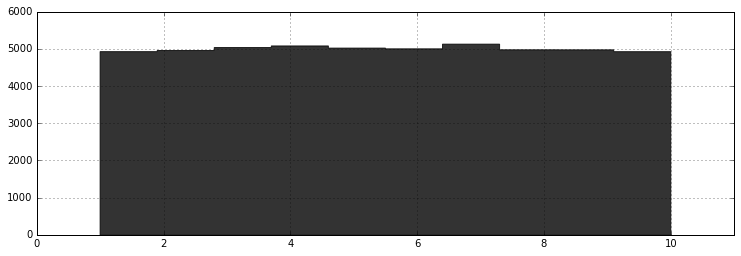

In [11]:
#generate a distrobution, sample from it and plot
uni = pm.DiscreteUniform("uni",1,10)
uni_vars = [uni.random() for i in range(50000)]
plt.hist(uni_vars, bins=10, color="k", alpha = .8, histtype="stepfilled")
plt.xlim(0, 11);
plt.grid(True);

In [43]:
#this brings up parameters for the distrobution
#pm.Uniform??
p = pm.Uniform('p', 0, 1)

In [44]:
# set constants
true_p = 0.05 #prob
N = 2000 #n_trials

In [45]:
#pm.rbernoulli??
#this simulates user behavior data
occurrences = pm.rbernoulli(true_p, N)
print(occurrences)
print(occurrences.sum())

[False False False ..., False False False]
118


In [46]:
print("Mean occurence is: %.4f" % occurrences.mean())

Mean occurence is: 0.0590


In [47]:
obs = pm.Bernoulli("obs", p, value=occurrences, observed=True)

mcmc = pm.MCMC([p, obs])
mcmc.sample(18000, 1000)

 [-----------------100%-----------------] 18000 of 18000 complete in 0.7 sec

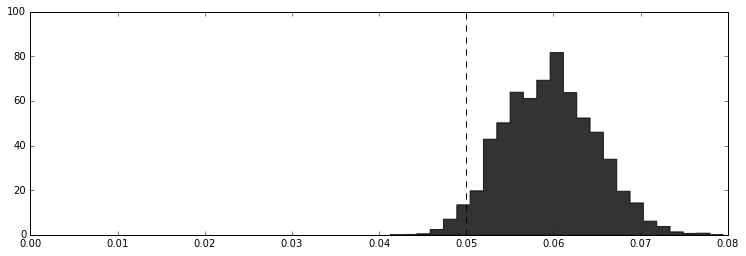

In [56]:
plt.hist(mcmc.trace("p")[:], bins=25, color="k", alpha = .8, histtype="stepfilled", normed=True)
plt.xlim(0,.08)
plt.vlines(true_p,0,100, linestyle="--")

In [80]:
#simulate two methods effectivness
true_p_A = 0.05
true_p_B = 0.04

N_A = 1500
N_B = 1500

observations_A = pm.rbernoulli(true_p_A, N_A)
observations_B = pm.rbernoulli(true_p_B, N_B)

In [81]:
#this is the 'true' population mean
print(observations_A.mean())
print(observations_B.mean())

0.052
0.04


In [82]:
#set up a uniform prior without any idea of the true mean
p_A = pm.Uniform("p_A", 0, 1)
p_B = pm.Uniform("p_B", 0, 1)

In [83]:
@pm.deterministic
def delta(p_A=p_A, p_B=p_B):
    return p_A - p_B

obs_A = pm.Bernoulli("obs_A", p_A, value=observations_A, observed=True)
obs_B = pm.Bernoulli("obs_B", p_B, value=observations_B, observed=True)

mcmc = pm.MCMC([p_A, p_B, delta, obs_A, obs_B])
mcmc.sample(20000, 1000)

 [-----------------100%-----------------] 20000 of 20000 complete in 1.3 sec

In [84]:
p_A_samples = mcmc.trace("p_A")[:]
p_B_samples = mcmc.trace("p_B")[:]
delta_samples = mcmc.trace("delta")[:]

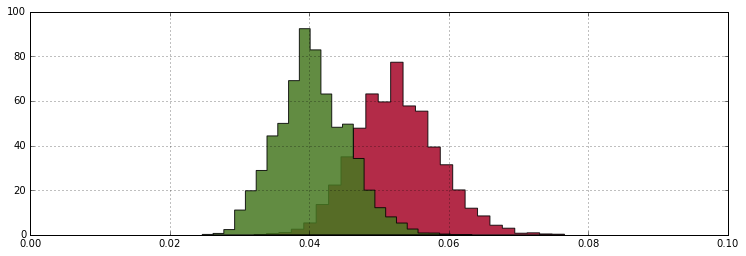

In [89]:
plt.hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628", normed=True)
plt.xlim(0, .1)

plt.hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_B$", color="#467821", normed=True)
plt.xlim(0, .1)
plt.grid(True)

0.94163157894736838

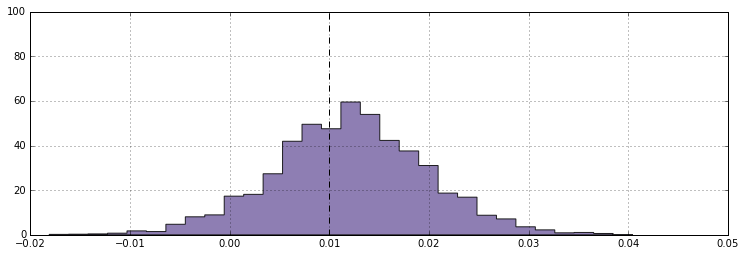

In [90]:
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta", color="#7A68A6", normed=True)
plt.vlines(.01,0,100,linestyle="--")
plt.grid(True)

(delta_samples > 0).mean()